In [3]:
#Packages
import warnings
warnings.filterwarnings('ignore')
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from PIL import Image
from pymks import (plot_microstructures, PrimitiveTransformer, TwoPointCorrelation)

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
#Append images all to one list.

path=r"C:\Users\mikep\Desktop\project\data\final\binarized"
images = []

def number(filename):
    return int(filename[53:-4])

for filename in sorted(glob.glob(path+"\*.tif"),
                       key=number):
    im=Image.open(filename)
    images.append(im)
np.shape(images[0])

(600, 600)

In [5]:
#List comprehension to convert the members of the "images" list to arrays.
imarrays = [np.array(x) for x in images]
imarrays[0].shape

(600, 600)

In [6]:
#Stacking all image arrays to create the 'sample' dimension and to convert the list to an array.
data_a = np.stack(imarrays, axis=0)
data_a.shape

(20, 600, 600)

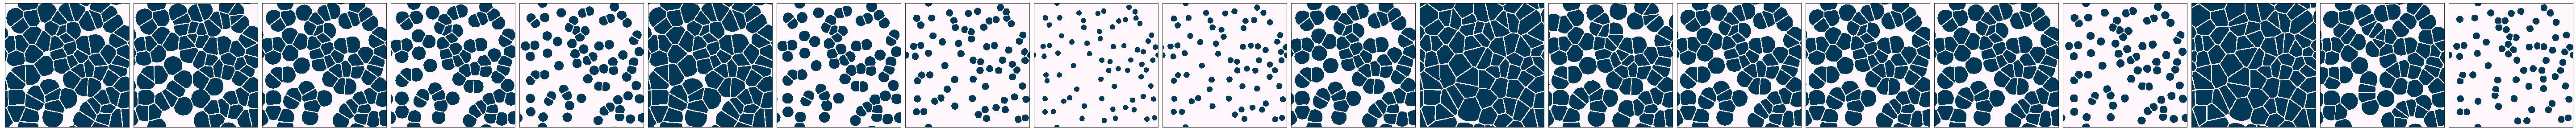

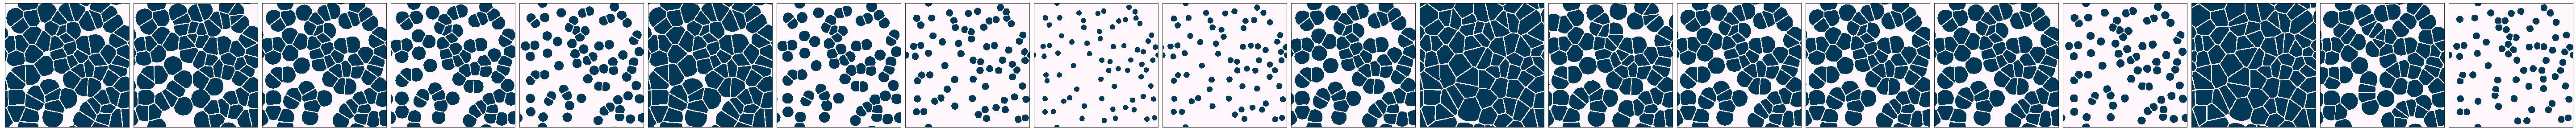

In [7]:
#Visualization of the microstructures.
plot_microstructures(*data_a[0:20], cmap='PuBu', colorbar=False)

In [8]:
#List comprehension to add the "phases" axis with the PrimitiveTransformer class.
data = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(data_a)
data.shape

(20, 600, 600, 2)

In [9]:
#Swaping the columns to solve the evolution issue.
data[:, :, :, [0, 1]]= data[:, :, :, [1, 0]]

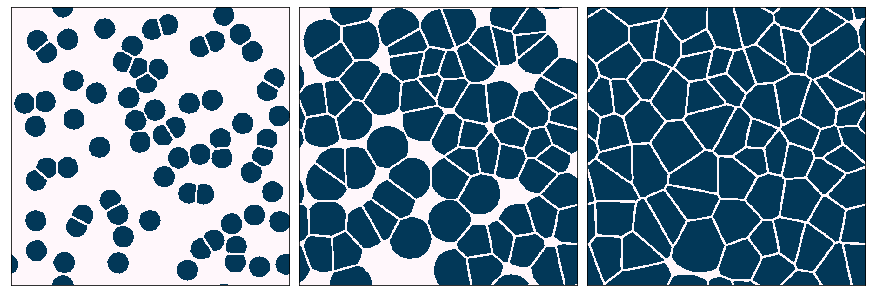

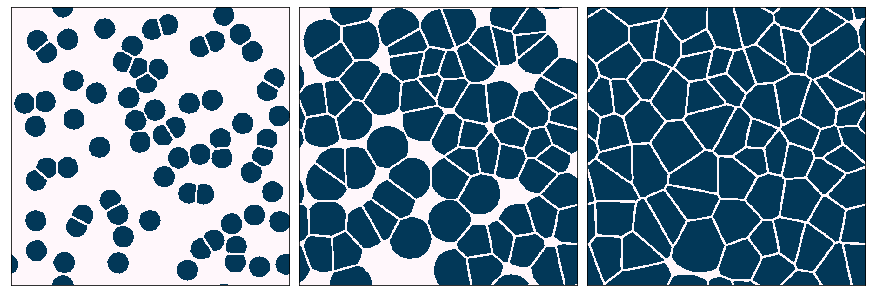

In [10]:
#Plot a microstructure.
plot_microstructures(data[4, :, :, 0], data[1, :, :, 0], data[11, :, :, 0], cmap='PuBu', colorbar=False)

In [11]:
#Calculating two-point statistics.
two_points = TwoPointCorrelation(periodic_boundary=True, cutoff=130, correlations=[(0, 0), (0, 1)]).transform(data)
initial_shape = two_points.shape
initial_shape

(20, 261, 261, 2)

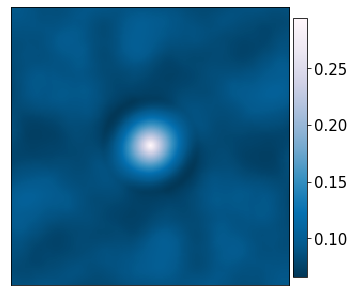

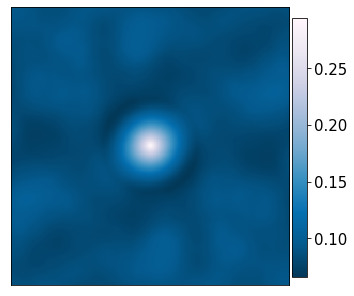

In [55]:
#Plotting two-point statistics.
plot_microstructures(two_points[4, :, :, 0], cmap='PuBu_r', showticks=False)

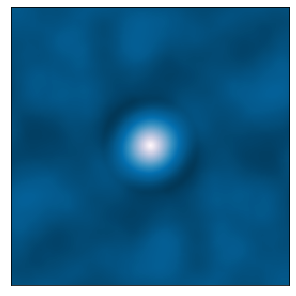

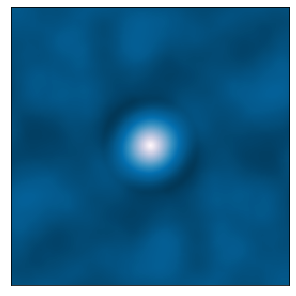

In [58]:
plot_microstructures(two_points[4, :, :, 0], cmap='PuBu_r', colorbar=False, showticks=False)

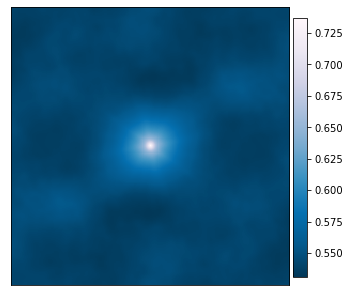

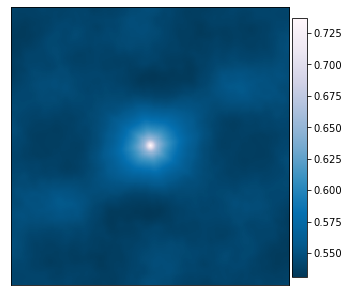

In [16]:
#5th two-point statistics.
plot_microstructures(two_points[1, :, :, 0], cmap='PuBu_r', showticks=False)

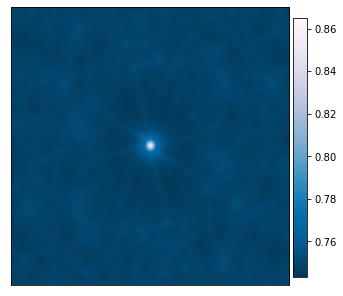

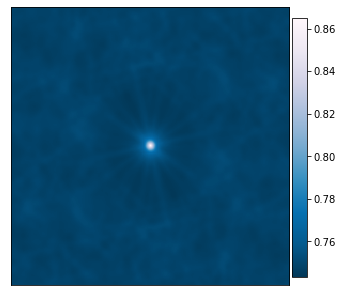

In [17]:
#13rd two-point statistics.
plot_microstructures(two_points[11, :, :, 0], cmap='PuBu_r', showticks=False)

In [53]:
#Recrystallized Volume Fraction
print('Recrystallized Volume Fraction 4 = ', two_points[4, 130, 130, 0].compute())
print('Recrystallized Volume Fraction 1 = ', two_points[1, 130, 130, 0].compute())
print('Recrystallized Volume Fraction 11 = ', two_points[11, 130, 130, 0].compute())

Recrystallized Volume Fraction 4 =  0.2942416666666667
Recrystallized Volume Fraction 1 =  0.7365222222222224
Recrystallized Volume Fraction 11 =  0.8648611111111111


In [21]:
#Reshape the two-point statistics for the PCA model.
reshaped_two_points=two_points.reshape(20, -1)
reshaped_two_points.shape

(20, 136242)

In [26]:
#PCA
pca = PCA(svd_solver='full', n_components=3)
pc_scores=pca.fit_transform(reshaped_two_points)
pc_scores.shape
print(pc_scores)

[[ 6.87714917e+01  5.03643912e+00  8.51655067e-02]
 [ 4.94118727e+01 -2.11026401e+00 -1.02832914e-01]
 [ 2.02760839e+01 -1.09153140e+01 -7.35146256e-01]
 [-2.17954855e+01 -1.80168230e+01 -2.81072123e-02]
 [-6.95471142e+01 -7.87735912e+00  1.55658576e+00]
 [ 7.97548646e+01  9.39862499e+00  3.49236315e-01]
 [-5.47220702e+01 -1.46999178e+01  1.22791883e+00]
 [-8.44020345e+01  7.60710170e+00 -8.09352397e-02]
 [-9.04707984e+01  2.22523762e+01 -1.07243602e+00]
 [-8.86765936e+01  1.69664202e+01 -7.29088473e-01]
 [ 3.37459845e+00 -1.47704567e+01 -6.00401321e-01]
 [ 1.02156963e+02  1.89144241e+01  6.85856601e-01]
 [ 3.75436668e+01 -5.92502949e+00  2.46006709e-01]
 [ 2.40172334e+01 -9.91551290e+00 -7.22163940e-01]
 [ 3.01461175e+01 -8.17699023e+00 -6.66380851e-01]
 [ 2.66074469e+01 -9.19544469e+00 -7.08409988e-01]
 [-7.97310769e+01  1.15596674e+00  1.18841481e+00]
 [ 1.00885652e+02  1.83408839e+01  6.61455905e-01]
 [ 3.14717630e+01 -7.55133625e+00 -4.08062762e-01]
 [-8.50725798e+01  9.48221123e+

In [23]:
print(pca.components_) 
print(pca.components_.shape)

[[ 0.00379795  0.00010298  0.00379776 ...  0.00010317  0.00379795
   0.00010298]
 [ 0.00024885 -0.00393584  0.00026243 ... -0.00394942  0.00024885
  -0.00393584]
 [ 0.00321233 -0.00293179  0.0033323  ... -0.00305176  0.00321233
  -0.00293179]]
(3, 136242)


In [24]:
#First principal component (PC1). 
pc1, pc2, pc3 = np.split(pc_scores, 3, axis=1)
print(pc1.shape)
print(pc1)
##Note: No "axis=1" in order to obtain pc-scores for different microstructure classes.

(20, 1)
[[ 68.77149171]
 [ 49.41187269]
 [ 20.27608385]
 [-21.79548554]
 [-69.54711423]
 [ 79.75486465]
 [-54.7220702 ]
 [-84.40203453]
 [-90.47079843]
 [-88.67659358]
 [  3.37459845]
 [102.15696262]
 [ 37.54366685]
 [ 24.01723344]
 [ 30.14611754]
 [ 26.60744689]
 [-79.73107694]
 [100.88565157]
 [ 31.47176299]
 [-85.0725798 ]]


In [27]:
zeros=np.zeros((20, 2))
reshaped_pc1=np.hstack((pc1,zeros))
print(reshaped_pc1)
print(reshaped_pc1.shape)

[[ 68.77149171   0.           0.        ]
 [ 49.41187269   0.           0.        ]
 [ 20.27608385   0.           0.        ]
 [-21.79548554   0.           0.        ]
 [-69.54711423   0.           0.        ]
 [ 79.75486465   0.           0.        ]
 [-54.7220702    0.           0.        ]
 [-84.40203453   0.           0.        ]
 [-90.47079843   0.           0.        ]
 [-88.67659358   0.           0.        ]
 [  3.37459845   0.           0.        ]
 [102.15696262   0.           0.        ]
 [ 37.54366685   0.           0.        ]
 [ 24.01723344   0.           0.        ]
 [ 30.14611754   0.           0.        ]
 [ 26.60744689   0.           0.        ]
 [-79.73107694   0.           0.        ]
 [100.88565157   0.           0.        ]
 [ 31.47176299   0.           0.        ]
 [-85.0725798    0.           0.        ]]
(20, 3)


In [28]:
#Explained variance by each principal component.
exp_var_pca=pca.explained_variance_ratio_*100
cum_sum=np.cumsum(pca.explained_variance_ratio_)*100
cum_sum_2d = [ '%.2f' % elem for elem in cum_sum ]
cum_sum_2d = np.array(cum_sum_2d)

print(exp_var_pca)

[9.65002193e+01 3.46702834e+00 1.22542565e-02]


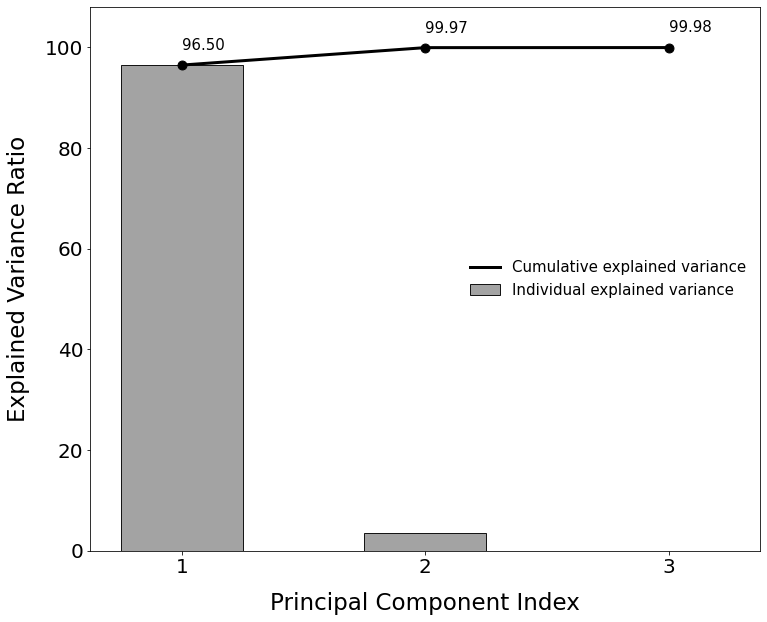

In [37]:
#plot explained variance

plt.rcParams.update({'font.size': 15})

fig = plt.figure(1, figsize=(12, 10))

x1 = range(1, len(exp_var_pca)+1)
y1 = exp_var_pca
x2 = range(1, len(cum_sum)+1)
y2 = cum_sum

plt.bar(x1, y1, color='#999999', edgecolor='black', linewidth='1', alpha=0.9, width = 0.5, align='center', label='Individual explained variance')

plt.plot(x2, y2, label='Cumulative explained variance', c='black', linewidth=3)
plt.scatter(x2, y2, s=80, facecolors='black', edgecolors='black')

for i, txt in enumerate(cum_sum_2d):
    plt.annotate(txt, (x2[i], y2[i]), size=15, xytext=(x2[i], y2[i]+3))
    
plt.xlabel('Principal Component Index', fontsize=23, labelpad=15)
plt.ylabel('Explained Variance Ratio', fontsize=23, labelpad=15)

plt.xticks(np.arange(1, 4, step=1), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(frameon=False, loc='best')
plt.ylim([0, 108])

fig.savefig(r'C:\Users\mikep\Desktop\thesis\figures\explained_variance.png', facecolor='w', dpi=600)
plt.show()

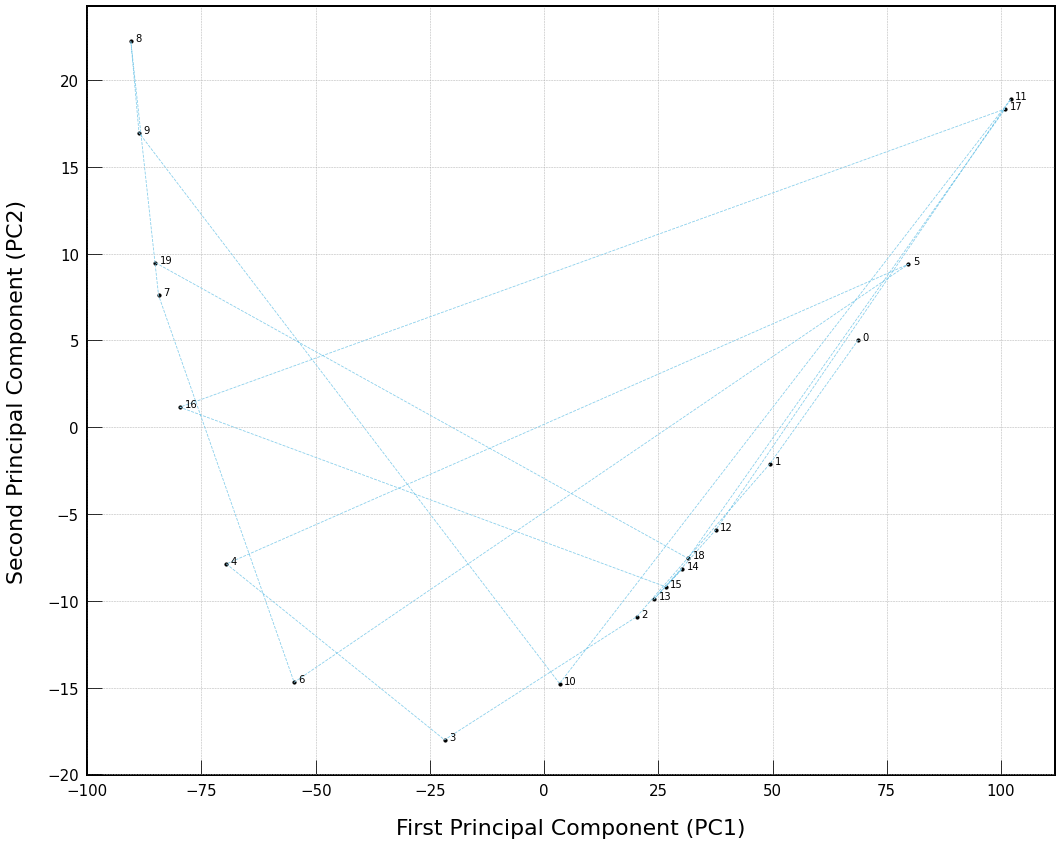

In [44]:
#Principal component analysis visualization.

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

plt.scatter(pc_scores[:,0], pc_scores[:,1], c='black', marker='o', s=10) # markeredgecolor='black') 
plt.plot(pc_scores[:,0], pc_scores[:,1], c='skyblue', ls='--', linewidth=0.8)

ax.set_xlabel("First Principal Component (PC1)",  fontsize=22, labelpad=20)
ax.set_ylabel("Second Principal Component (PC2)",  fontsize=22, labelpad=20)

ax.tick_params(axis="both", size=15, direction="in", pad=8)

#ax.set_title('Time Evolution of PC-scores', fontsize=30, pad=20)

ax.grid(which='major', axis='both', linestyle = '--', linewidth = 0.5)

ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('2') 

n = range(0,20)
for i, txt in enumerate(n):
    plt.annotate(txt, (pc_scores[i,0], pc_scores[i,1]), xytext=(pc_scores[i,0]+1, pc_scores[i,1]), size=10)
    
fig.tight_layout()
fig.savefig(r'C:\Users\mikep\Desktop\thesis\figures\pc-evolution_b.png', facecolor='w', dpi=600)
fig.show()

In [45]:
#Inverting and reshaping the data.

two_points_inv_pc = pca.inverse_transform(pc_scores)
two_points_inv_pc1 = pca.inverse_transform(reshaped_pc1)

recovered_two_points_pc = np.reshape(two_points_inv_pc, initial_shape)
recovered_two_points_pc1 = np.reshape(two_points_inv_pc1, initial_shape)

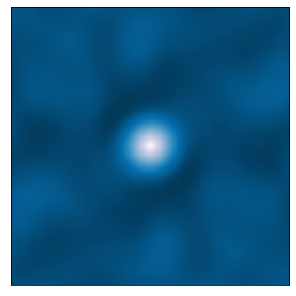

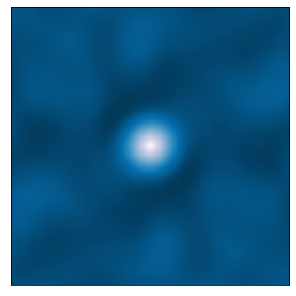

In [59]:
#Recovered two-point statistics using both PC scores.
plot_microstructures(recovered_two_points_pc[4, :, :, 0], cmap='PuBu_r', colorbar=False, showticks=False)

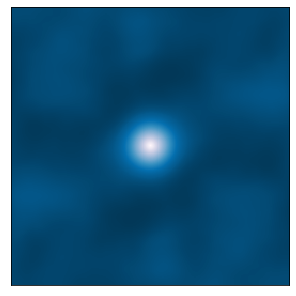

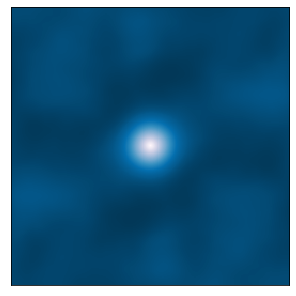

In [60]:
#Recovered first two-point statistics using only PC1.
plot_microstructures(recovered_two_points_pc1[4, :, :, 0], cmap='PuBu_r', colorbar=False, showticks=False)

In [48]:
#Save the pc scores.
df_pc1 = pd.DataFrame(pc1)
df_pc = pd.DataFrame(pc_scores)

df_pc1.to_csv(r'C:\Users\mikep\Desktop\project\data\final\pc1.csv')
df_pc.to_csv(r'C:\Users\mikep\Desktop\project\data\final\pc_scores.csv')

df_pc

,0,1,2
0,68.771492,5.036439,0.085166
1,49.411873,-2.110264,-0.102833
2,20.276084,-10.915314,-0.735146
3,-21.795486,-18.016823,-0.028107
4,-69.547114,-7.877359,1.556586
5,79.754865,9.398625,0.349236
6,-54.722070,-14.699918,1.227919
7,-84.402035,7.607102,-0.080935
8,-90.470798,22.252376,-1.072436
9,-88.676594,16.966420,-0.729088


In [49]:
zeros2=np.zeros((20, 3))
zeros2[(3,0)]=-84.402035
print(zeros2)

[[  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [-84.402035   0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]
 [  0.         0.         0.      ]]


In [50]:
two_points_inv_pcnew = pca.inverse_transform(zeros2)
print(two_points_inv_pcnew.shape)

(20, 136242)


In [51]:
recovered_two_points = np.reshape(two_points_inv_pcnew, initial_shape)
print(recovered_two_points.shape)

(20, 261, 261, 2)


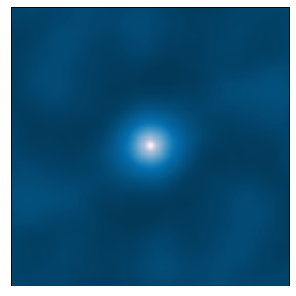

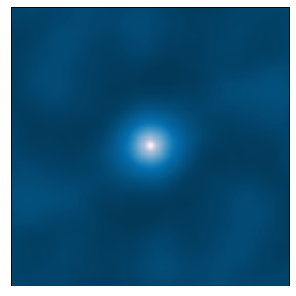

In [64]:
plot_microstructures(recovered_two_points[4, :, :, 0], colorbar=False, cmap='PuBu_r', showticks=False)